<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-No-Lineal-y-Regresion-Logistica/blob/main/a%C3%B1o2021_act7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Act 7.1: Archivo Gastos y Costos 2021

In [ ]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
# Cargar el dataset
gastos = pd.read_csv("Gastos_costos_2021.csv")
gastos.head(3)

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO GASTO,IMPORTE,IVA,TOTAL MX
0,0,2021-01-01,0001010100750847116902,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,490.00,78.40,568.4
1,1,2021-01-01,0001010100752163714102,"BANCO NACIONAL DE MEXICO, S.A.",COMISION COBRADA,COMISION BANCARIA,345.00,55.20,400.2
2,2,2021-01-01,19788,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",MOTO E7 PLUS AZUL 64GB 4RAM,COMPRAS,3447.41,551.59,3999.0


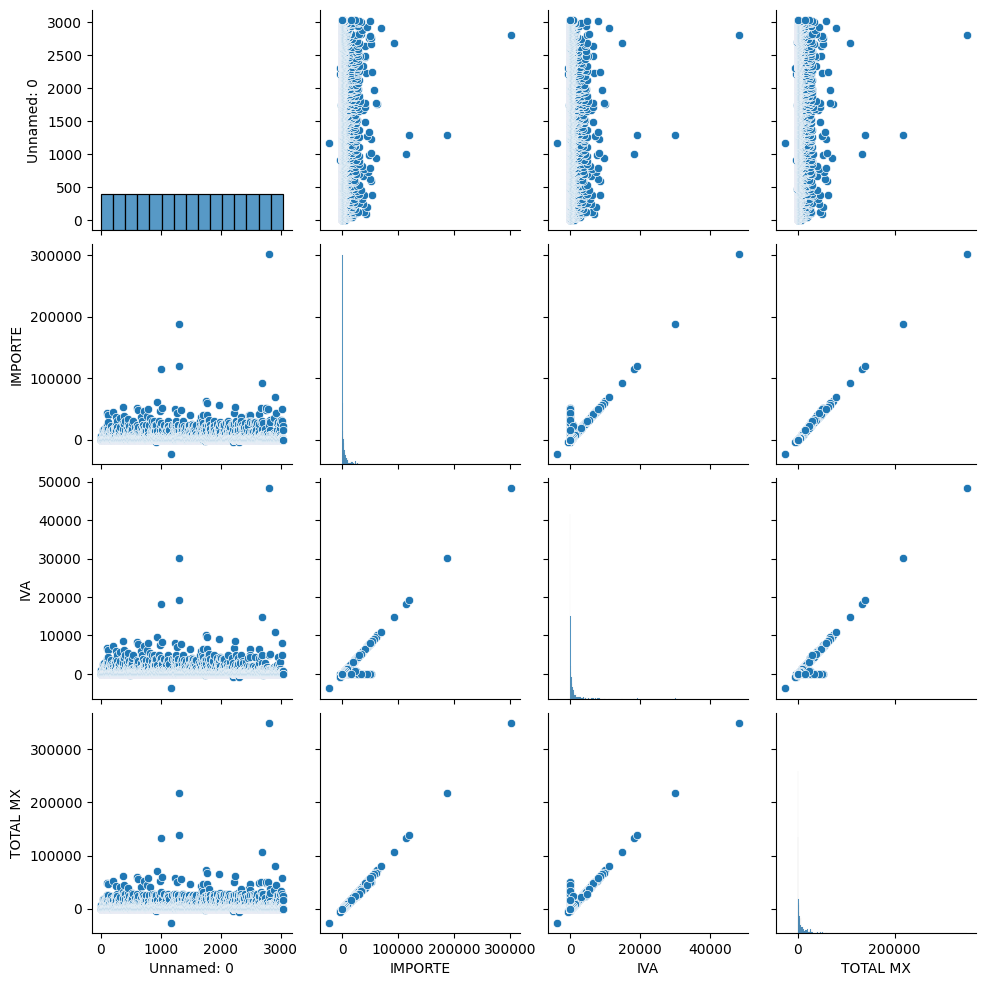

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(gastos)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gastos[['IVA']]
Var_Dep= gastos['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

## Modelo 1: Cuadrático

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gastos['IVA'], gastos['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.17615811e-05, 6.74758108e+00, 7.08455073e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gastos['IVA'], gastos['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

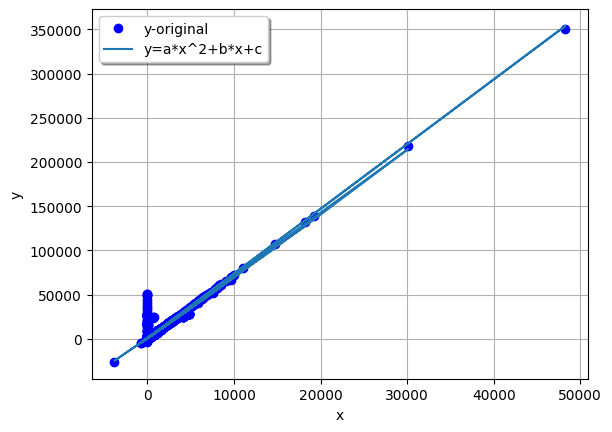

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x IVA')
plt.ylabel('y TOTAL MX')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
R2

0.9028388872975792

## Modelo 2: A la cuarta

In [ ]:
def  func2 (x, a, b, c):
     return a*x**4 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func2, gastos['IVA'], gastos['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([3.43407118e-15, 6.88097768e+00, 6.56771304e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func2, gastos['IVA'], gastos['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a * x ** 4 + b * x + c

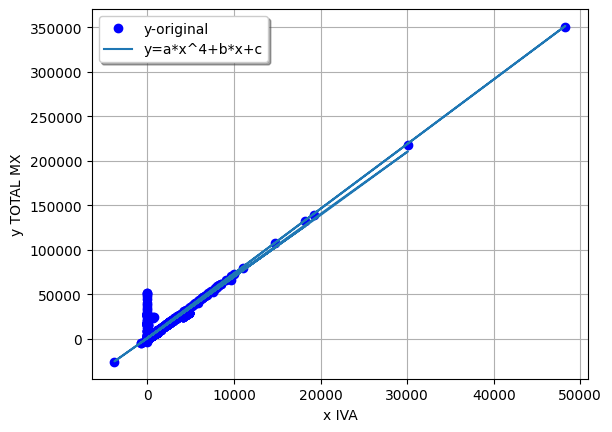

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y=a*x^4+b*x+c")
plt.xlabel('x IVA')
plt.ylabel('y TOTAL MX')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

0.9024705613576128